# Different values of Pi

The constant $\pi = 3.1415... $ and there isn't much we can do about that. However, if we consider $$pi = \frac{C}{d}$$ where $C$ is the circumference of a circle and $d$ its diameter, then things can get more interesting.

## Step 1: Manhattan

The circumference are all the points that lie on the edge of a circle. If we consider the unit circle in our normal euclidean space we can calculate it as $$(x,y) \text{ is on the circle if } \sqrt{x^2 + y^2} \le 1$$
We can render this something like this:

(-0.5, 500.5, 500.5, -0.5)

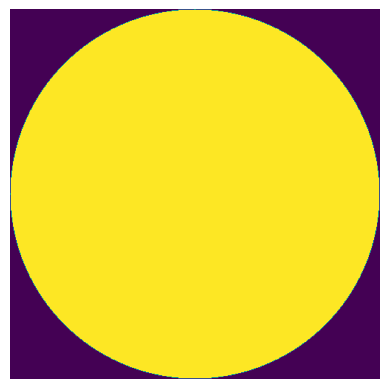

In [30]:
from matplotlib import pyplot as plt
from math import sqrt

resolution = 250
circle = np.zeros((resolution*2+1, resolution*2+1))
res_squared = resolution * resolution

for x in range(-resolution, resolution):
    for y in range(-resolution, resolution):
        norm_x = x / resolution
        norm_y = y / resolution
        if sqrt(norm_x*norm_x + norm_y*norm_y) <= 1:
            circle[x+resolution][y+resolution] = 1

plt.imshow(circle)
plt.axis('off')

In [2]:
import scipy.spatial.distance as distance
import numpy as np
from matplotlib import pyplot as plt

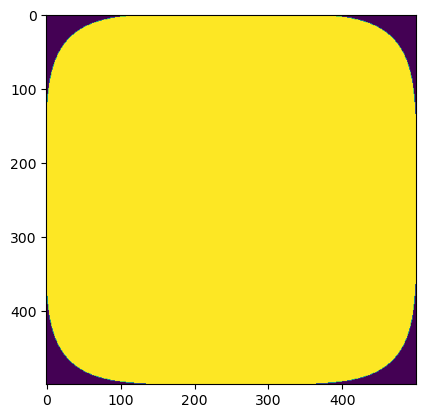

In [22]:
resolution = 250
circle = []
for x in range(0, resolution, 1):
    row = []
    for y in range(0, resolution, 1):
        X = np.array([[0,0], [x/resolution,y/resolution]])
        row.append(distance.pdist(X, 'minkowski', p=5)[0] <= 1)
    circle.append(row)
circle = np.concatenate((np.flip(circle, axis=1), circle), axis=1) 
circle = np.concatenate((np.flip(circle, axis=0), circle), axis=0) 
plt.imshow(circle)